In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import datasets
import scipy.optimize as op 
import seaborn as sns
from __future__ import division

In [43]:
#Import the data in csv file
#1---Heart condition
#0---healthy

df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [44]:
# The Logistic Function
def sigmoid(z): 
    return 1 / (1 + np.exp(-z))

In [45]:
# Logistic Regression Cost Function
def calcCostFunction(theta, X, y):
    
    # number of training examples
    m,n = X.shape  
    
    # Calculate h = X * theta (we are using vectorized version)
    h = X.dot(theta) 
    
    # Calculate the Cost J
    J = -(np.sum(y * np.log(sigmoid(h)) + (1 - y) * np.log(1 - sigmoid(h)))/m)
    
    return J

In [46]:
# The Gradient Function
def calcGradient(theta, X, y):
    
    # number of training examples
    m,n = X.shape    
    
    # Calculate h = X * theta
    h = X.dot(theta)
    
    # Calculate the error = (h - y)
    error = sigmoid(h) - y
    
    # Calculate the new theta
    gradient = 1/m * (X.T).dot(error)
    
    return gradient

In [47]:
# The Feature Scaling and Normalization
# for two variables

def FeatureScalingNormalization(X):
    # Initialize the following variables:
    # Make a copy of the X vector and call it X_norm
    X_norm = X 

    # Initialize mu: It will contain the average 
    # value of X in training set.
    mu = np.zeros(X.shape[1]) 
    
    # Initialize sigma: It will contain the Range(max-min)
    # of X or Standard Deviation
    sigma = np.zeros(X.shape[1]) 

    # mu (mean)
    mu = np.vstack((X[0].mean(), \
                    X[1].mean()))

    # The Standard Deviation calculation with NumPy,
    # requires the argument "degrees of freedom" = 1
    sigma = np.vstack((X[0].std(ddof=1),\
                       X[1].std(ddof=1)))     

    # Number of training examples
    m = X.shape[1] 
    
    # Make a vector of size m with the mu values
    mu_matrix = np.multiply(np.ones(m), mu).T 
    
    # Make a vector of size m with the sigma values    
    sigma_matrix = np.multiply(np.ones(m), sigma).T
    
    # Apply the Feature Scaling Normalization formula
    X_norm = np.subtract(X, mu).T
    X_norm = X_norm /sigma.T
    
    return [X_norm, mu, sigma]

In [48]:
# Calculate the accuracy
def CalcAccuracy(theta, X):
    p = sigmoid(X.dot(theta)) >= 0.5
    return p

In [49]:
# Make the X and y numpy arrays,
# containing the values of
# Radius and Texture
X = np.vstack((np.asarray(df.age.values), \
               np.asarray(df.thalach.values)))
y = np.asarray(df.target.values)

Text(0, 0.5, 'thalach')

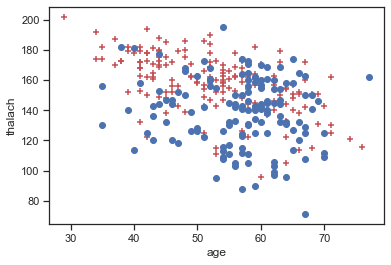

In [50]:
# Plot the data
for i in range(len(y)): #Run loop m times
    if y[i]==0.0:       #If the value of y is 0 then color it yellow and mark with shape'o'
        c = 'b'
        m = u'o'
    if y[i]==1.0:      #If the value of y is 1 then color it black and mark with shape '+'
        c = 'r'
        m = u'+'
    plt.scatter(X[0][i], X[1][i], color=c, marker=m) #whatever the case plot the value with respect to x0 and x1 parameters
    
# Put labels
plt.xlabel(df.columns[df.columns.get_loc("age")])
plt.ylabel(df.columns[df.columns.get_loc("thalach")])


In [51]:
# Normalize X using the FeatureScalingNormalization function, and 
# copy the results in the "featuresNormalizeresults" list
featuresNormalizeresults = FeatureScalingNormalization(X)

# get the normalized X matrix
X = np.asarray(featuresNormalizeresults[0]).T

# get the mean
mu = featuresNormalizeresults[1]

# get the sigma
sigma = featuresNormalizeresults[2]


In [52]:
# Add a column of 'ones' to X

# number of training examples
m = len(y) 

# number of features
n = len(X)
X_orig=X
# Add a column of ones to the X matrix
X = np.vstack((np.ones(m), X)).T

In [53]:
# Gradient Descent Advanced Optimization: BFGS
# Update and find the optimal theta
m , n = X.shape;
initial_theta = np.zeros(n);
Result = op.minimize(fun = calcCostFunction, 
                                 x0 = initial_theta, 
                                 args = (X, y),
                                 method = 'BFGS',
                                 jac = calcGradient);
theta = Result.x;
theta


array([ 0.19444732, -0.17576669,  0.94485331])

In [54]:
x1=X_orig[0]
x2=X_orig[1]
dot_theta=np.dot(theta,theta)#This is the square of l2 norm

Decision Boundary with lamda change


Text(0.5, 1.0, 'lamda = 0')

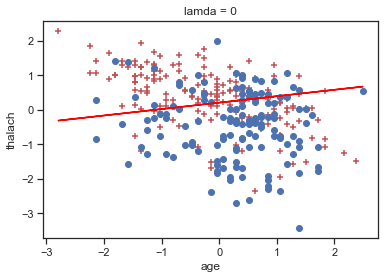

In [59]:
# Plot the data with the 
# Logistic Regression Decision Boundary
lamda= 0
# Create a plot set
plot_x = x1
#plot_x contains 2 elements one is the min of X(col1) and another is max of X(col1)
#plot_x : [min(x1), max(x1)]

# Calculate the Decision Boundary
plot_y = -(theta[1]/theta[2])*x1 + ((theta[0]-(0.5*lamda*dot_theta))/theta[2])

for i in range(len(y)):
    if y[i]==0.0:
        c = 'b'
        m = u'o'
    if y[i]==1.0:
        c = 'r'
        m = u'+'
    plt.scatter(X.T[1][i], X.T[2][i], color=c, marker=m) 
    
# Plot the Decision Boundary (red line)
plt.plot(plot_x, plot_y, color='red')

# Put labels
plt.xlabel(df.columns[df.columns.get_loc("age")])
plt.ylabel(df.columns[df.columns.get_loc("thalach")])
plt.title('lamda = 0')

Text(0.5, 1.0, 'lamda = 1')

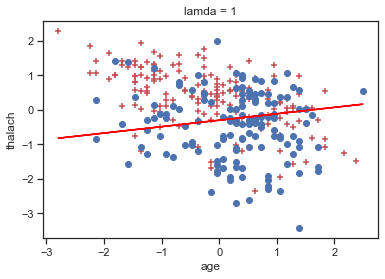

In [58]:
# Plot the data with the 
# Logistic Regression Decision Boundary
lamda= 1
# Create a plot set
plot_x = x1
#plot_x contains 2 elements one is the min of X(col1) and another is max of X(col1)
#plot_x : [min(x1), max(x1)]

# Calculate the Decision Boundary
plot_y = -(theta[1]/theta[2])*x1 + ((theta[0]-(0.5*lamda*dot_theta))/theta[2])

for i in range(len(y)):
    if y[i]==0.0:
        c = 'b'
        m = u'o'
    if y[i]==1.0:
        c = 'r'
        m = u'+'
    plt.scatter(X.T[1][i], X.T[2][i], color=c, marker=m) 
    
# Plot the Decision Boundary (red line)
plt.plot(plot_x, plot_y, color='red')

# Put labels
plt.xlabel(df.columns[df.columns.get_loc("age")])
plt.ylabel(df.columns[df.columns.get_loc("thalach")])
plt.title('lamda = 1')

Text(0.5, 1.0, 'lamda = 3')

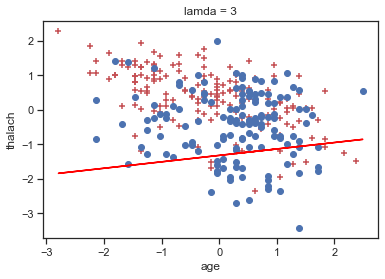

In [57]:
# Plot the data with the 
# Logistic Regression Decision Boundary
lamda= 3
# Create a plot set
plot_x = x1
#plot_x contains 2 elements one is the min of X(col1) and another is max of X(col1)
#plot_x : [min(x1), max(x1)]

# Calculate the Decision Boundary
plot_y = -(theta[1]/theta[2])*x1 + ((theta[0]-(0.5*lamda*dot_theta))/theta[2])

for i in range(len(y)):
    if y[i]==0.0:
        c = 'b'
        m = u'o'
    if y[i]==1.0:
        c = 'r'
        m = u'+'
    plt.scatter(X.T[1][i], X.T[2][i], color=c, marker=m) 
    
# Plot the Decision Boundary (red line)
plt.plot(plot_x, plot_y, color='red')

# Put labels
plt.xlabel(df.columns[df.columns.get_loc("age")])
plt.ylabel(df.columns[df.columns.get_loc("thalach")])
plt.title('lamda = 3')

Text(0.5, 1.0, 'lamda = 4')

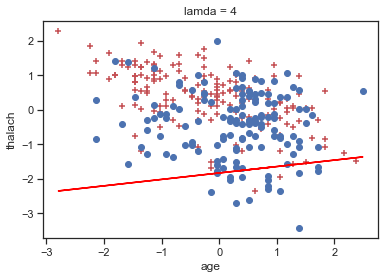

In [56]:
# Plot the data with the 
# Logistic Regression Decision Boundary
lamda= 4
# Create a plot set
plot_x = x1
#plot_x contains 2 elements one is the min of X(col1) and another is max of X(col1)
#plot_x : [min(x1), max(x1)]

# Calculate the Decision Boundary
plot_y = -(theta[1]/theta[2])*x1 + ((theta[0]-(0.5*lamda*dot_theta))/theta[2])

for i in range(len(y)):
    if y[i]==0.0:
        c = 'b'
        m = u'o'
    if y[i]==1.0:
        c = 'r'
        m = u'+'
    plt.scatter(X.T[1][i], X.T[2][i], color=c, marker=m) 
    
# Plot the Decision Boundary (red line)
plt.plot(plot_x, plot_y, color='red')

# Put labels
plt.xlabel(df.columns[df.columns.get_loc("age")])
plt.ylabel(df.columns[df.columns.get_loc("thalach")])
plt.title('lamda = 4')